In [2]:
import pystan
import os
import model_data as md #this python script needs to be saved in the same folder as the jupyter notebook to load it in
import pandas as pd
import pickle
import arviz as az 
pd.options.mode.chained_assignment = None


In [3]:
#set these variables for extracting the data using the model_data python script

fnames = ['LM_low-dose_acq.csv','LM_high-dose_acq.csv']#change these to the names of the csv files
cue = ['Uncued', 'Cued']
condition = ['Saline', 'Ropinirole']
numsessions = 5

In [4]:
#change directory to where the csv files are saved
os.chdir('../phd_data')

#use model_data python script to extract data (a bit slow)
saline_cued = md.model_data(fnames, cue[1], condition[0], numsessions)
saline_uncued = md.model_data(fnames, cue[0], condition[0], numsessions)
rop_cued = md.model_data(fnames, cue[1], condition[1], numsessions)
rop_uncued = md.model_data(fnames, cue[0],condition[1],numsessions)

In [5]:
#load in models (run this cell if models have already been compiled and saved with pickle)
#if models have not been compiled/saved, run the two cells below

#change directory to where the pickled stan files are located
os.chdir('rGT_models')

basic = pickle.load(open('basic.pkl', 'rb'))
basic2 = pickle.load(open('basic2.pkl', 'rb'))
pscale = pickle.load(open('pscale.pkl', 'rb'))
pscale2 = pickle.load(open('pscale2.pkl', 'rb'))
pindep = pickle.load(open('pindep.pkl', 'rb'))
pindep2 = pickle.load(open('pindep2.pkl', 'rb'))


In [10]:
#compile stan code for different models
'''this only needs to be done once; after youve compiled them the first time, you can use
the pickle code in the cell below to save them, and then the code above in the future to 
load them in for a new session, without recompiling'''

#change directory to where the stan files are located
os.chdir('../phd_data/rGT_models')

#compile stan code
basic = pystan.StanModel(file = 'rGT_RLmodel_basic.stan') #etaneg, etapos, beta, m
basic2 = pystan.StanModel(file = 'rGT_RLmodel_basic2par.stan') #eta, beta, m
pscale = pystan.StanModel(file = 'rGT_RLmodel_pScale.stan') #etaneg, etapos, beta, pscale, pintercept
pscale2 = pystan.StanModel(file = 'rGT_RLmodel_pScale2par.stan') #eta, beta, pscale, pintercept
pindep = pystan.StanModel(file = 'rGT_RLmodel_pIndependent.stan') #etaneg, etapos, beta, w1, w2, w3, w4
pindep2 = pystan.StanModel(file = 'rGT_RLmodel_pIndependent2par.stan') #eta, beta, w1, w2, w3, w4

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2b8d6dc32b83d5abb252b7f69f588054 NOW.


In [11]:
#save compiled models (will save into current working directory - can check this with os.getcwd())
with open('basic.pkl', 'wb') as f:
    pickle.dump(basic, f)
    
with open('basic2.pkl', 'wb') as f:
    pickle.dump(basic2, f)
    
with open('pscale.pkl', 'wb') as f:
    pickle.dump(pscale, f)
    
with open('pscale2.pkl', 'wb') as f:
    pickle.dump(pscale2, f)
    
with open('pindep.pkl', 'wb') as f:
    pickle.dump(pindep, f)

with open('pindep2.pkl', 'wb') as f:
    pickle.dump(pindep2, f)



In [19]:
basic_sc = basic.sampling(data = saline_cued, iter = 1600, warmup = 800, chains = 4)

In [20]:
basic_su = basic.sampling(data = saline_uncued, iter = 1600, warmup = 800, chains = 4)

In [7]:
basic_rc = basic.sampling(data = rop_cued, iter = 2000, warmup = 1000, chains = 4, control={'max_treedepth': 12})

In [5]:
basic_ru = basic.sampling(data = rop_uncued, iter = 2000, warmup = 1000, chains = 4, control={'max_treedepth': 12})

In [21]:
basic2_sc = basic2.sampling(data = saline_cued, iter = 1600, warmup = 800, chains = 4)

In [22]:
basic2_su = basic2.sampling(data = saline_uncued, iter = 1600, warmup = 800, chains = 4)

In [ ]:
basic2_rc = basic2.sampling(data = rop_cued, iter = 1600, warmup = 800, chains = 4)

In [ ]:
basic2_ru = basic2.sampling(data = rop_uncued, iter = 1600, warmup = 800, chains = 4)

In [9]:
pscale_sc = pscale.sampling(data = saline_cued, iter = 2000, warmup = 1000, chains = 4,
                           control={'adapt_delta': 0.99, 'max_treedepth':12})

In [16]:
pscale_su = pscale.sampling(data = saline_uncued, iter = 2000, warmup = 1000, chains = 4)

In [17]:
pscale_rc = pscale.sampling(data = rop_cued, iter = 2000, warmup = 1000, chains = 4, 
                            control={'max_treedepth': 12, 'adapt_delta': 0.99})

In [12]:
pscale_ru = pscale.sampling(data = rop_uncued, iter = 2000, warmup = 1000, chains = 4, control={'max_treedepth': 12})

In [ ]:
pscale2_sc = pscale2.sampling(data = saline_cued, iter = 1600, warmup = 800, chains = 4)

In [ ]:
pscale2_su = pscale2.sampling(data = saline_uncued, iter = 1600, warmup = 800, chains = 4)

In [ ]:
pscale2_rc = pscale2.sampling(data = rop_cued, iter = 1600, warmup = 800, chains = 4)

In [ ]:
pscale2_ru = pscale2.sampling(data = rop_uncued, iter = 1600, warmup = 800, chains = 4)

In [7]:
pindep_sc = pindep.sampling(data = saline_cued, iter = 2000, warmup = 1000, chains = 4)

In [10]:
pindep_su = pindep.sampling(data = saline_uncued, iter = 2000, warmup = 1000, chains = 4,
                           control={'adapt_delta': 0.99})

In [11]:
pindep_rc = pindep.sampling(data = rop_cued, iter = 2000, warmup = 1000, chains = 4,
                           control={'adapt_delta': 0.99})

In [19]:
print(pindep_rc)

Inference for Stan model: anon_model_363fb604dc3dad24a613e5ba998f9554.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                        mean se_mean     sd    2.5%     25%     50%     75%   97.5%  n_eff   Rhat
mu_pr[1]               -2.15  2.1e-3   0.06   -2.27   -2.19   -2.15    -2.1   -2.03    984    1.0
mu_pr[2]                -1.9  2.8e-3    0.1   -2.11   -1.97    -1.9   -1.83   -1.72   1330    1.0
mu_pr[3]               -0.83  8.3e-3   0.28   -1.32   -1.03   -0.86   -0.66   -0.21   1134    1.0
mu_pr[4]               -0.31  4.2e-3   0.11   -0.58   -0.36   -0.29   -0.23   -0.13    742    1.0
mu_pr[5]               -0.06  7.1e-4   0.03   -0.12   -0.08   -0.06   -0.04 -9.2e-3   1541    1.0
mu_pr[6]              2.5e-3  1.6e-4 6.8e-3 -9.3e-3 -2.1e-3  1.9e-3  6.5e-3    0.02   1812    1.0
mu_pr[7]              2.0e-3  1.2e-4 4.7e-3 -6.1e-3 -1.2e-3  1.5e-3  4.6e-3    0.01   1595    1.0
sigma[1]                0.2

In [6]:
pindep_ru = pindep.sampling(data = rop_uncued, iter = 1600, warmup = 800, chains = 4)

In [ ]:
pindep2_sc = pindep2.sampling(data = saline_cued, iter = 1600, warmup = 800, chains = 4)

In [ ]:
pindep2_su = pindep2.sampling(data = saline_uncued, iter = 1600, warmup = 800, chains = 4)

In [ ]:
pindep2_rc = pindep2.sampling(data = rop_cued, iter = 1600, warmup = 800, chains = 4)

In [ ]:
pindep2_ru = pindep2.sampling(data = rop_uncued, iter = 1600, warmup = 800, chains = 4)

In [14]:
save_model('pindep_rc_dict.pkl',pindep,pindep_rc,rop_cued)
save_model('pindep_sc_dict.pkl',pindep,pindep_sc,saline_cued)
save_model('pindep_su_dict.pkl',pindep,pindep_su,saline_uncued)


<ipython-input-13-c34b7cb4c4d5>:6: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  pickle.dump(dict, f, protocol=pickle.HIGHEST_PROTOCOL)


In [17]:
save_model('pscale_sc_dict.pkl',pscale,pscale_sc,saline_cued)

<ipython-input-13-c34b7cb4c4d5>:6: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  pickle.dump(dict, f, protocol=pickle.HIGHEST_PROTOCOL)


In [18]:
#to save fit:
#model and fit must be saved in dictionary together, with the model first
def save_model(name,model,fit,data):
    model_dict = {'model': model, 'fit': fit, 'data': data}
    with open(name, 'wb') as f:
        pickle.dump(model_dict, f, protocol=pickle.HIGHEST_PROTOCOL)
        ##model is the compiled stan code 
        ##fit is the sample of the posterior distribution 
        ##data is the raw data put through the model 
        ##all is dumped into a pickled file 
        ##pickle.dump allows us to save the objects into a .pkl file 
        ##ex) 'pindep_rc_dict.pkl' = name 
        ### --> 'pindep_rc_dict.pkl' can now be loaded into Python and visualized/analyzed 
        ##without pickle, all objects would be lost when closing Jupyter 
    


In [4]:
#load fit:
with open('basic_su_dict.pkl', 'rb') as f:
    basic_su_dict = pickle.load(f)
    
#extract model fit from loaded dictionary
basic_su = basic_su_dict['fit']

/home/brett/anaconda3/envs/stan_env/lib/python3.8/site-packages/arviz/plots/traceplot.py:250: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (200), generating only 20 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'mu_pr\n0'}>,
        <AxesSubplot:title={'center':'mu_pr\n0'}>],
       [<AxesSubplot:title={'center':'mu_pr\n1'}>,
        <AxesSubplot:title={'center':'mu_pr\n1'}>],
       [<AxesSubplot:title={'center':'mu_pr\n2'}>,
        <AxesSubplot:title={'center':'mu_pr\n2'}>],
       [<AxesSubplot:title={'center':'mu_pr\n3'}>,
        <AxesSubplot:title={'center':'mu_pr\n3'}>],
       [<AxesSubplot:title={'center':'sigma\n0'}>,
        <AxesSubplot:title={'center':'sigma\n0'}>],
       [<AxesSubplot:title={'center':'sigma\n1'}>,
        <AxesSubplot:title={'center':'sigma\n1'}>],
       [<AxesSubplot:title={'center':'sigma\n2'}>,
        <AxesSubplot:title={'center':'sigma\n2'}>],
       [<AxesSubplot:title={'center':'sigma\n3'}>,
        <AxesSubplot:title={'center':'sigma\n3'}>],
       [<AxesSubplot:title={'center':'beta_samp\n0'}>,
        <AxesSubplot:title={'center':'beta_samp\n0'}>],
       [<AxesSubplot:title={'center':'beta_samp\n1'}>,
        <A

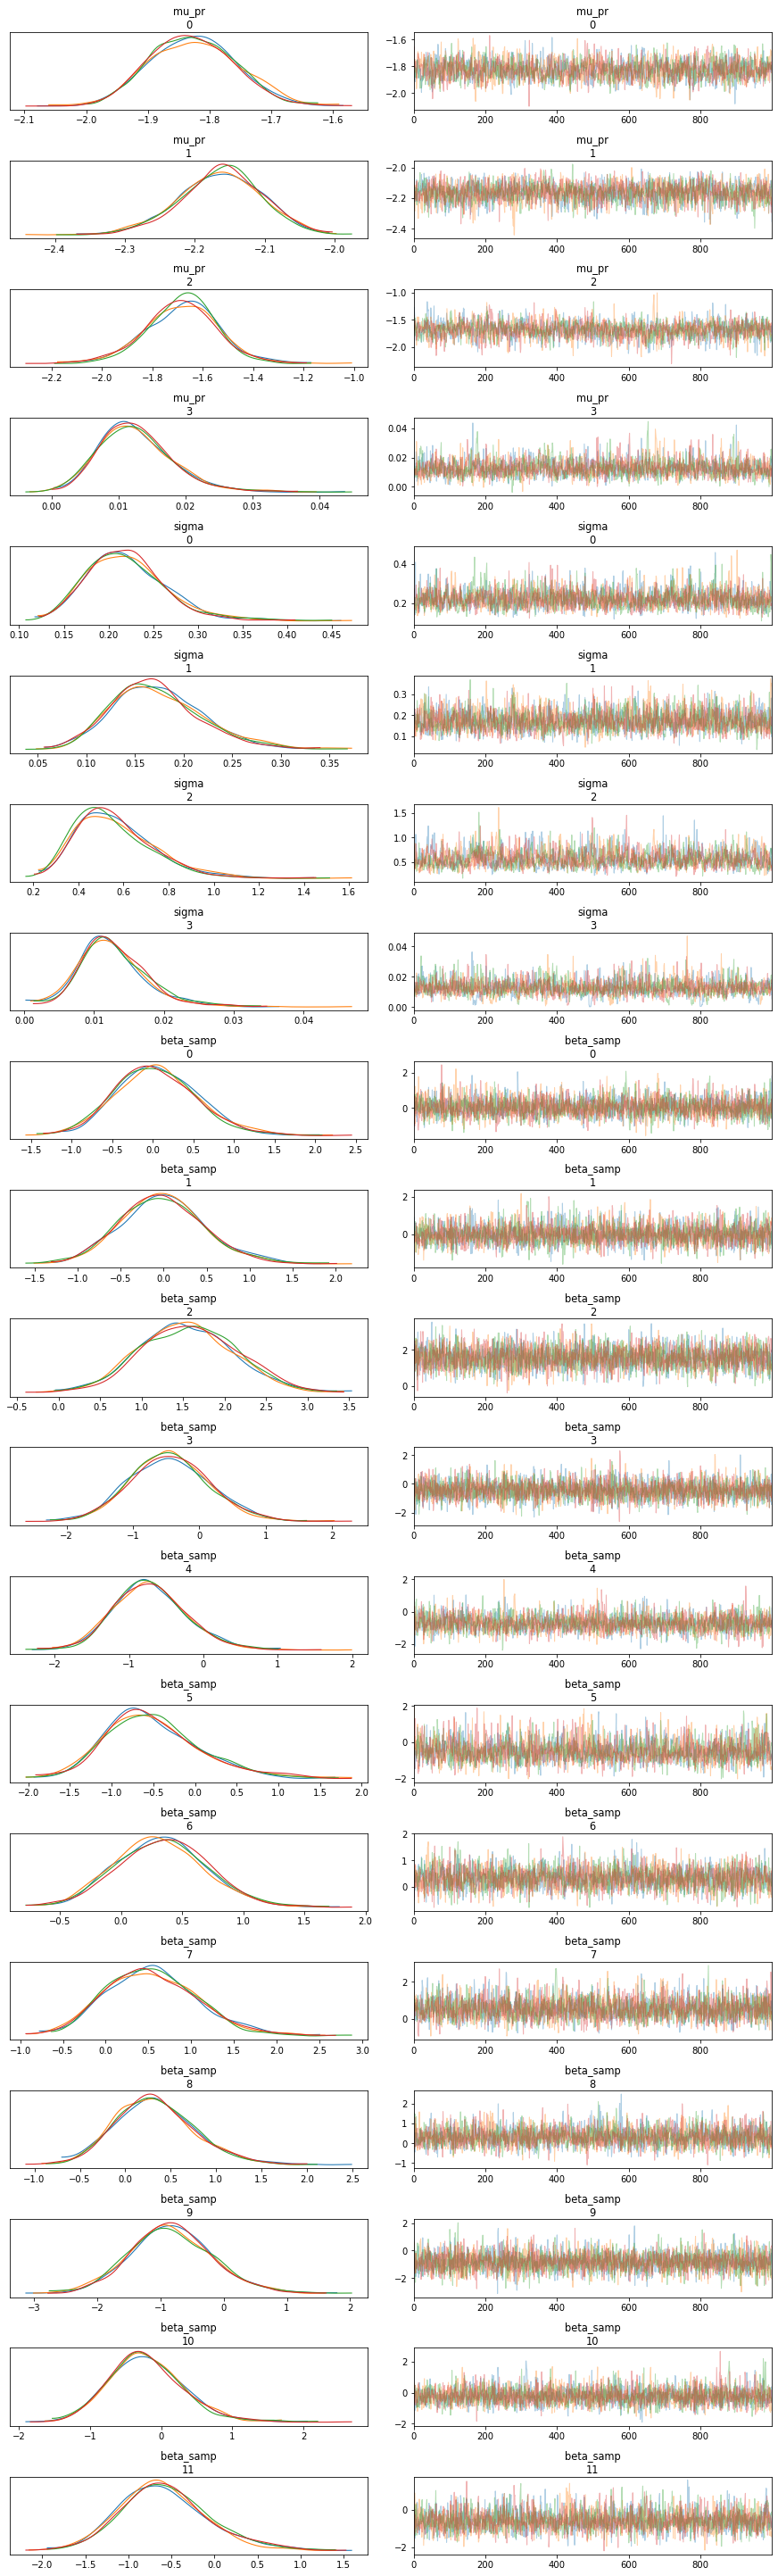

In [5]:
#plotting
az.plot_trace(basic_su)

In [6]:
#overall summary info
print(basic_su)

Inference for Stan model: anon_model_14b5874ea6426282069b0e4cc2e13c14.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                        mean se_mean     sd    2.5%     25%     50%     75%  97.5%  n_eff   Rhat
mu_pr[1]               -1.83  1.7e-3   0.07   -1.95   -1.88   -1.83   -1.78  -1.69   1615    1.0
mu_pr[2]               -2.16  1.5e-3   0.06   -2.29    -2.2   -2.16   -2.12  -2.05   1505    1.0
mu_pr[3]               -1.68  3.5e-3   0.14   -1.98   -1.77   -1.68   -1.59   -1.4   1664    1.0
mu_pr[4]                0.01  1.4e-4 5.6e-3  3.8e-3  8.9e-3    0.01    0.02   0.03   1637    1.0
sigma[1]                0.22  1.0e-3   0.04    0.15    0.19    0.22    0.25   0.32   1851    1.0
sigma[2]                0.17  1.0e-3   0.05    0.09    0.14    0.17     0.2   0.28   2062    1.0
sigma[3]                0.56  5.3e-3   0.17    0.31    0.44    0.54    0.66   0.96   1044    1.0
sigma[4]                0.01  1.5e-

In [7]:
#extract specific parameters 
basic_su_summary = basic_su.extract(permuted = True)
basic_su_etaneg = basic_su_summary['etaNegative']
basic_su_etapos = basic_su_summary['etaPositive']

basic_su_etaneg.mean()

0.06540987730352187

In [10]:
#convert to pandas dataframe, and save as a csv file

basic_su_df = basic_su.to_dataframe()
basic_su_df.to_csv('LM_saline-uncued_basic-fit')

#load back in
basic_su_df = pd.read_csv('LM_saline-uncued_basic-fit')
